In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Hebbian rule

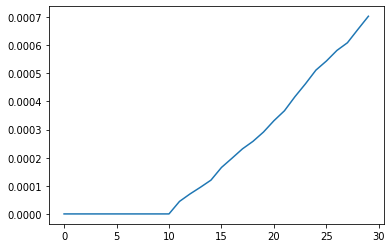

In [7]:
learning_rate = 0.0001
Wab = 0

log_act = []
log_wei = []
for i in range(30):
  Aa = np.random.uniform(0.4, 0.8)             # Aa = neuron assocaited to meat. We are showing the meat.
  if i > 10: Ab = np.random.uniform(0.4, 0.8)  # Ab = neuron assocaited to the bell. The bell is ringing.
  else: Ab = 0.0                               # Ab = neuron assocaited to the bell. The bell is not ringing.
  log_act.append(Ab)
  Wab += Aa*Ab*learning_rate
  log_wei.append(Wab)

plt.plot(log_wei)

In [9]:
Ab = 0.8
Ab * Wab  # Aa

0.0005623113410338853

Hopfield network

In [0]:
A = """
.....
X...X
X...X
X...X
XXXXX
"""

B = """
XXXXX
..X..
..X..
..X..
..X..
"""


In [23]:
# I can convert A (which is a string) to a pattern
def to_pattern(letter):
  return np.array([+1 if c == "X" else -1 for c in letter.replace("\n","")])

to_pattern(A)

array([ 1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1])

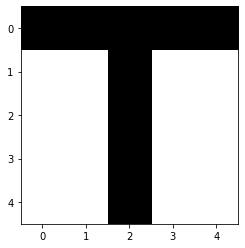

In [24]:
def display_pattern(pat):
  plt.imshow(pat.reshape(5,5), cmap=plt.cm.binary)

display_pattern(to_pattern(A))
display_pattern(to_pattern(B))

In [0]:
pat = np.array([to_pattern(A), to_pattern(B)])  # matrix of patterns

In [0]:
"""
Restrictions of connections in a Hopfield net:
  w_ii = 0 for all i        (no unit has a connection with itself)
  w_ij = w_ji for all i,j   (connections are symmetric)

This function return the matrix of weights that achives this restrictions
The value for each weight is defined by Hebbian rule
"""

def train(pat):
  r, c = pat.shape          # returns (2, 5), so r = 2 and c = 5
  W = np.zeros((c, c))      # matrix of zeros of size 5x5
  for p in pat:
    W = W + np.outer(p, p)  # normalization: outer(p, p) compute the outer product of p and p

  W[np.diag_indices(c)] = 0 # diag_indices creates a set of indices to access the diagonal of a (c, c) array (where c = 5),
                            # so here we turn the diagonal of the matrix W into 0
  return W/r


"""
Updating units in the Hopfield network is performed using the following rule:
  if dot(s_j, w_ij) > 0: s_i = +1 
  otherwise: s_i = -1

This function return the pattern updated
"""

def recall(W, pat, steps=15):
  for _ in range(steps):
    display_pattern(pat)
    plt.show()
    net_act = np.dot(pat, W)
    net_act[net_act<0] = -1
    net_act[net_act>=0] = 1
    pat = net_act
  return pat

In [0]:
W = train(pat)

In [0]:
# Noisy

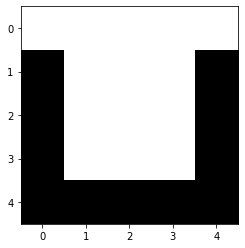

In [82]:
Apat = to_pattern(A)
display_pattern(Apat)

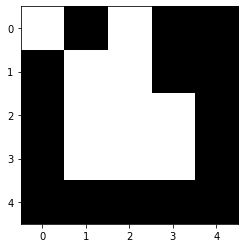

In [83]:
Ad = np.copy(Apat)
Ad[[1,4,3,8]] *= -1

display_pattern(Ad)

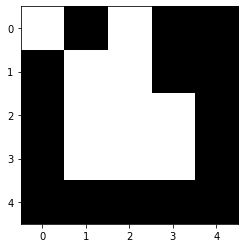

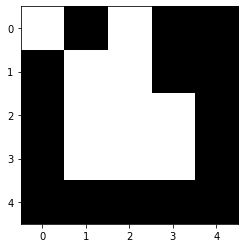

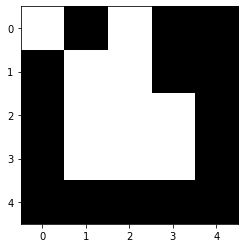

In [95]:
nn = recall(W, Ad, steps=3)
# display_pattern(nn)